In [75]:
import keras
from keras.layers import Input, Dense, Concatenate
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, Conv2D, MaxPooling1D, MaxPooling2D
from keras.optimizers import SGD
from keras import initializers
from keras.regularizers import l2

import player
import game
import neural_network
import mcts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import board as b
import keras
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd
import numpy as np

In [2]:
board = b.Board()
board.board

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [88]:
value_model = keras.models.load_model('./best_value_model.tf')
policy_model = keras.models.load_model('./best_policy_model.tf')

In [89]:
tree, edge_statistics = mcts.MCTS.get_tree_and_edges()
board = b.Board()

len(edge_statistics.keys())

16167

In [90]:
X = []
Y = []
N = []
Y_move = []

X_init_state = []
X_final_state = []

keys = list(edge_statistics.keys())
for key in keys:
    state = edge_statistics[key]
    initial_state, final_state = key.split("2")
    X_init_state.append(initial_state)
    X_final_state.append(final_state)

    initial_arr = board.str2arr(initial_state)
    final_arr = board.str2arr(final_state)
    move = final_arr - initial_arr
    p_type = move.sum()
    move = move*p_type
    move = move.reshape(-1, 9)[0]
    move = np.where(move==1)[0][0]

    Y.append(state["Q"])
    N.append(state["N"])
    Y_move.append(move)

X = np.array(X)
Y = np.array(Y)
Y_move = np.array(Y_move)

df = pd.DataFrame({
'init_state':X_init_state,
'final_state':X_final_state,
'move':Y_move,
'value':Y,
    'N':N
})

# df = df[df["N"]>0]
values_df = df[["final_state", "value", "N"]]
moves_df = df[["init_state", "move"]]
master_df = values_df.merge(moves_df, left_on = "final_state", right_on = "init_state", how = "left")

state_freq = master_df["final_state"].value_counts()
inv_state_freq = sum(state_freq)/state_freq
inv_state_freq.name = "inv_freq"
inv_state_freq
master_df = master_df.merge(inv_state_freq, left_on="final_state", right_index = True)



In [6]:
master_df["N"].sum()

276528

In [7]:
master_df["final_state"].value_counts().sum()

46506

In [68]:
test = np.array([[  0,  -1,  1],
                 [  0,   -1, 0],
                 [  -1,  1,  1]] )


n_map = {-1:"o", 0: " ", 1: "x"}

str_state = ''.join([n_map[i] for i in test.reshape(9,)])
str_state

pred, prob = model.predict(np.stack([[test]],-1))
print(pred.round(2))
print(prob.round(2))

pred[0][2]+-pred[0][0]

[[0.08 0.73 0.19]]
[[0.49 0.   0.   0.05 0.   0.46 0.   0.   0.   0.  ]]


0.110342056

In [100]:
test = np.array([[ 1,   1,  1],
                 [ 1,   -1,  -1],
                 [-1,   0,  1]])

n_map = {-1:"o", 0: " ", 1: "x"}

str_state = ''.join([n_map[i] for i in test.reshape(9,)])
str_state
inp = np.stack([[test]], axis=-1)
               
pred, prob = value_model.predict(inp), policy_model.predict(inp)
print(pred.round(2))
print(prob.round(2))

pred[0][2]+-pred[0][0]

[[0. 0. 1.]]
[[0.   0.   0.   0.   0.   0.   0.   0.29 0.71]]


0.99925643

In [87]:
test = np.array([[ 1,  -1,  -1],
                 [ 0,  -1,  1],
                 [1,   -1,   1]])

n_map = {-1:"o", 0: " ", 1: "x"}

str_state = ''.join([n_map[i] for i in test.reshape(9,)])
str_state

pred, prob = model.predict(np.stack([[test]],-1))
print(pred.round(2))
print(prob.round(2))

pred[0][2]+-pred[0][0]

[[0.43 0.   0.56]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


0.12905231

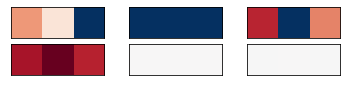

array([[ 0.00071542, -0.00084323,  0.00106974]], dtype=float32)

In [78]:
filters = model.layers[1].get_weights()[0]
f_min, f_max = filters.min(), filters.max()
n_filters, ix = 6 , 1

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(1):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='RdBu', vmin = -1, vmax = 1)
        ix += 1

# show the figure
plt.show()
f[:, :, j]

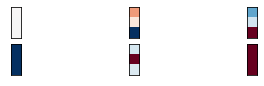

array([[-1.2320834],
       [-1.3402404],
       [-1.1140423]], dtype=float32)

In [79]:
filters = model.layers[2].get_weights()[0]
f_min, f_max = filters.min(), filters.max()
n_filters, ix =6 , 1

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(1):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='RdBu', vmin = -1, vmax = 1)
        ix += 1

# show the figure
plt.show()
f[:, :, j]

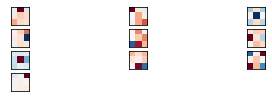

array([[ 0.13586086,  0.04786732, -1.668233  ],
       [ 0.0312494 , -0.06971234, -0.01181914],
       [ 0.0387936 , -0.07001686, -0.07100535]], dtype=float32)

In [80]:
filters = model.layers[3].get_weights()[0]
f_min, f_max = filters.min(), filters.max()
n_filters, ix = 10 , 1

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(1):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='RdBu', vmin = -1, vmax = 1)
        ix += 1

# show the figure
plt.show()
f[:, :, j]